<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Hyperparameter Tuning

## *Data Science Unit 4 Sprint 2 Assignment 4*

## Your Mission, should you choose to accept it...

To hyperparameter tune and extract every ounce of accuracy out of this telecom customer churn dataset: <https://drive.google.com/file/d/1dfbAsM9DwA7tYhInyflIpZnYs7VT-0AQ/view> 

## Requirements

- Load the data
- Clean the data if necessary (it will be)
- Create and fit a baseline Keras MLP model to the data.
- Hyperparameter tune (at least) the following parameters:
 - batch_size
 - training epochs
 - optimizer
 - learning rate (if applicable to optimizer)
 - momentum (if applicable to optimizer)
 - activation functions
 - network weight initialization
 - dropout regularization
 - number of neurons in the hidden layer
 
 You must use Grid Search and Cross Validation for your initial pass of the above hyperparameters
 
 Try and get the maximum accuracy possible out of this data! You'll save big telecoms millions! Doesn't that sound great?


In [26]:
import pandas as pd
import numpy as np
import tensorflow
from sklearn.preprocessing import MinMaxScaler, Normalizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [27]:
data = 'https://lambdaschool-data-science.s3.amazonaws.com/telco-churn/WA_Fn-UseC_-Telco-Customer-Churn+(1).csv'

In [28]:
df = pd.read_csv(data)
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [29]:
df = df.drop('customerID', axis=1)
df = df.drop('TotalCharges', axis=1)

In [30]:
df.fillna(0, inplace=True)
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
    return df
df = handle_non_numerical_data(df)
print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                2               0             1   
1              1                2               1             0   
2              1                2               1             1   
3              0                2               1             0   
4              1                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         2   
1                 

In [31]:
X=df.drop("Churn", axis='columns').values
y=df.Churn.values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Instantiate the model
model = Sequential()
model.add(Dense(8, input_dim=18, activation='relu', name="FirstHidden"))
model.add(Dense(8, activation='relu', name="SecondHidden"))
model.add(Dense(1, name="Output"))
# Compile the model 
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Let's inspect our new architecture
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstHidden (Dense)          (None, 8)                 152       
_________________________________________________________________
SecondHidden (Dense)         (None, 8)                 72        
_________________________________________________________________
Output (Dense)               (None, 1)                 9         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X_train, y_train, epochs=20, verbose=False, validation_split = .2)

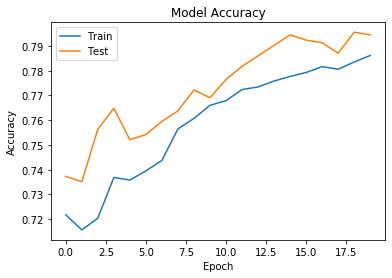

In [38]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [40]:
# Function to create model, required for KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=18, activation='relu', name="FirstHidden"))
    model.add(Dense(8, activation='relu', name="SecondHidden"))
    model.add(Dense(1, name="Output"))
    # Compile the model 
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)


# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [20]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.7471197843551636 using {'batch_size': 60, 'epochs': 20}
Means: 0.6503210961818695, Stdev: 0.1947228978689384 with: {'batch_size': 10, 'epochs': 20}
Means: 0.5597629368305206, Stdev: 0.24291447543619524 with: {'batch_size': 20, 'epochs': 20}
Means: 0.6431513786315918, Stdev: 0.185959465793395 with: {'batch_size': 40, 'epochs': 20}
Means: 0.7471197843551636, Stdev: 0.016405932124728382 with: {'batch_size': 60, 'epochs': 20}
Means: 0.6580551624298095, Stdev: 0.1951997972804492 with: {'batch_size': 80, 'epochs': 20}
Means: 0.6349181890487671, Stdev: 0.18291915713634765 with: {'batch_size': 100, 'epochs': 20}


## Stretch Goals:

- Try to implement Random Search Hyperparameter Tuning on this dataset
- Try to implement Bayesian Optimiation tuning on this dataset using hyperas or hyperopt (if you're brave)
- Practice hyperparameter tuning other datasets that we have looked at. How high can you get MNIST? Above 99%?
- Study for the Sprint Challenge
 - Can you implement both perceptron and MLP models from scratch with forward and backpropagation?
 - Can you implement both perceptron and MLP models in keras and tune their hyperparameters with cross validation?